<a href="https://colab.research.google.com/github/yogapatangga/MachineLearningTasks/blob/main/1stWeekTasks/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Iris dataset and display the first few rows

In [2]:
dataset = pd.read_csv('Iris.csv')
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Assuming the last column is the target label and the rest are features

In [29]:
X = dataset.iloc[:, 1:5].values  # Features
y = dataset.iloc[:, 5].values   # Target

## Splitting the dataset into the Training set and Test set (70:30)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [33]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix and print the classification report

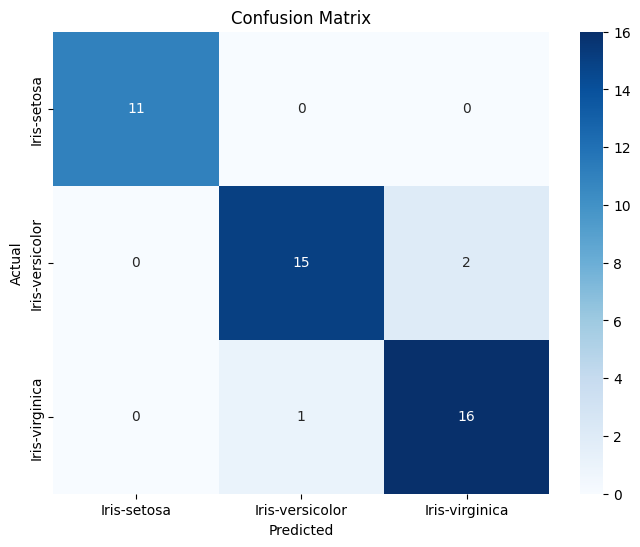

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45


Accuracy: 93.33%


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")